## 第3讲 基于未知输入观测器的鲁棒残差生成

### 例1. 离散时间系统的数值仿真

#### 定义系统参数

导入numpy模块

In [1]:
import numpy as np

系统参数矩阵
$$
A = \begin{bmatrix}
0.3 & -0.7\\
0.6 & -0.5
\end{bmatrix}, 
B = \begin{bmatrix}
 0 \\
 1
\end{bmatrix},
C = \begin{bmatrix}
1 & 0
\end{bmatrix}
$$

In [3]:
A = np.array([[0.3,-0.7],
              [0.6,-0.5]])
B = np.array([[0],[1]])
C = np.array([[1,0]])
print(A)

[[ 0.3 -0.7]
 [ 0.6 -0.5]]


#### 设置仿真时间

In [4]:
Nk = 101
tspan = np.arange(0, Nk, 1) # 从0到100
print(tspan)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


#### 预定义数据存储数组

In [5]:
x = np.zeros((2,Nk))
u = np.zeros((1,Nk))
y = np.zeros((1,Nk))
print(y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


#### 变量初始化 
变量初值
$$ 
x(0) = \begin{bmatrix} 
0 \\
0.1
\end{bmatrix} , y(0) = Cx(0), u(0) = 1 
$$

In [6]:
x[:,[0]] = np.array([[0],[0.1]]) 
y[:,[0]] = C@x[:,[0]]
u[:,[0]] = 1 
print(x[:,[0]])

[[0. ]
 [0.1]]


#### 进行数值仿真 
动态系统模型
$$
\left\{
\begin{array}{l}
x(k+1) = Ax(k) + Bu(k) \\
y(k) = Cx(k)
\end{array}
\right.
$$

In [8]:
for k in range(1,Nk):
    u[:,[k-1]] = 1 + np.sin(0.1*(k-1))
    x[:,[k]] = A@x[:,[k-1]] + B@u[:,[k-1]]
    y[:,[k]] = C@x[:,[k]]

[[ 0.00000000e+00 -7.00000000e-02 -6.86000000e-01 -6.13783392e-01
  -5.31091853e-01 -6.34924258e-01 -7.02213188e-01 -7.23725690e-01
  -7.60907033e-01 -8.03365038e-01 -8.36031357e-01 -8.64214005e-01
  -8.90458422e-01 -9.12415686e-01 -9.29520449e-01 -9.42234405e-01
  -9.50397409e-01 -9.53763720e-01 -9.52341478e-01 -9.46180867e-01
  -9.35324969e-01 -9.19876233e-01 -8.99995210e-01 -8.75880932e-01
  -8.47772590e-01 -8.15951279e-01 -7.80735371e-01 -7.42476581e-01
  -7.01557094e-01 -6.58385820e-01 -6.13394126e-01 -5.67031534e-01
  -5.19761285e-01 -4.72055693e-01 -4.24391414e-01 -3.77244694e-01
  -3.31086608e-01 -2.86378352e-01 -2.43566635e-01 -2.03079219e-01
  -1.65320641e-01 -1.30668171e-01 -9.94680460e-02 -7.20320068e-02
  -4.86341855e-02 -2.95083653e-02 -1.48456451e-02 -4.79252997e-03
   5.50532721e-04  1.13015684e-03 -3.05944902e-03 -1.19764237e-02
  -2.55316718e-02 -4.35897536e-02 -6.59702389e-02 -9.24495092e-02
  -1.22762992e-01 -1.56607806e-01 -1.93645784e-01 -2.33506856e-01
  -2.75792

#### 画图

In [9]:
# 导入matplotlib模块中的pyplot函数
import matplotlib.pyplot as plt

画状态x的曲线

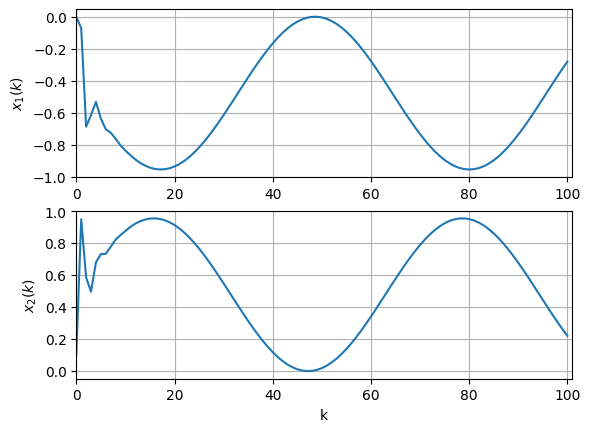

In [10]:
plt.figure()
plt.subplot(211)
plt.plot(tspan,x[[0],:].T)
plt.xlim([0,Nk])
plt.ylabel('$x_1(k)$')
plt.grid()
plt.subplot(212)
plt.plot(tspan,x[[1],:].T)
plt.xlim([0,Nk])
plt.xlabel('k')
plt.ylabel('$x_2(k)$')
plt.grid()
plt.savefig("Fig1.png", dpi=300)
plt.show()

画输出y的曲线

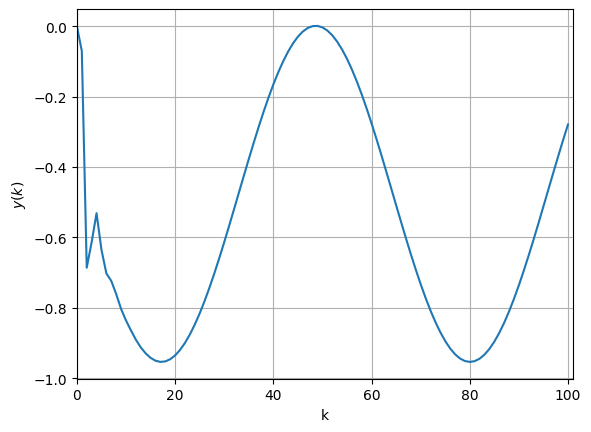

In [9]:
plt.figure()
plt.plot(tspan,y[[0],:].T)
plt.xlim([0,Nk])
plt.xlabel('k')
plt.ylabel('$y(k)$')
plt.grid()
# plt.savefig("Fig2.png", dpi=300)
plt.show()